In [19]:
import json, os, re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import pickle as pkl
import pandas as pd

In [20]:
with open("cdiac_priority_list", 'rb') as f:
	cdiac_priority_list = pkl.load(f)

cdiac_priority_list.sort(key = lambda x: -x[2])

In [21]:
print(len(cdiac_priority_list))
for i in range(len(cdiac_priority_list)):
	if i == 10:
		break
	print(cdiac_priority_list[i])

1500438
('/eagle/Xtract/cdiac/cdiac.ornl.gov/cdiac.ornl.gov/pub8/oceans/Model_results/OCIM_DeVries/ocim_anthco2_storageT.mat', 'jsonxml', 3.287202836864106)
('/eagle/Xtract/cdiac/cdiac.ornl.gov/pub8old/pub8/oceans/Model_results/OCIM_DeVries/ocim_anthco2_storageT.mat', 'jsonxml', 3.287202836864106)
('/eagle/Xtract/cdiac/cdiac.ornl.gov/pub8old/oceans/Model_results/OCIM_DeVries/ocim_anthco2_storageT.mat', 'jsonxml', 3.287202836864106)
('/eagle/Xtract/cdiac/cdiac.ornl.gov/cdiac.ornl.gov/pub8/oceans/Model_results/OCIM_DeVries/ocim_anthco2_transport.mat', 'jsonxml', 3.2773695477065248)
('/eagle/Xtract/cdiac/cdiac.ornl.gov/pub8old/pub8/oceans/Model_results/OCIM_DeVries/ocim_anthco2_transport.mat', 'jsonxml', 3.2773695477065248)
('/eagle/Xtract/cdiac/cdiac.ornl.gov/pub8old/oceans/Model_results/OCIM_DeVries/ocim_anthco2_transport.mat', 'jsonxml', 3.2773695477065248)
('/eagle/Xtract/cdiac/cdiac.ornl.gov/cdiac.ornl.gov/pub8/oceans/NOAA_Workshop/CSIRO_Matear_Data/t15_1880_2100_heat.nc.gz', 'tabula

In [22]:
numtoname = pd.read_csv("csv-try-2.csv")
numtoname.head()


count = 0

names = numtoname['path']
indices = range(1, len(names) + 1)


nametonum = dict(zip(names, indices))

print(len(nametonum.items()))


214314


In [23]:
dict_of_dicts = dict()
for subdir, dirs, files in os.walk("cdiac_data"):
	for file_name in files:
		name = file_name.split(".")[0].split("cdiac")[1].split("scores")[0]
		print(name)
		with open(os.path.join(subdir, file_name), "r") as f:
			dict_of_dicts[name] = json.load(f)



images
hdf
python
netcdf
keyword
jsonxml
c-code


In [24]:
count = 0
for k, v in dict_of_dicts.items():
	for file_name, dict_of_scores in v.items():
		count += 1
	print(count)

214314
428628
642942
857256
1071570
1285884
1500198


In [37]:
count = 0
scores = {"readability": [], "completeness": [], "entropy": [], "yield": []}
for name, extractor, score in cdiac_priority_list:
	if extractor != "tabular":
		try:
			file_index = str(nametonum[name])
			file_score_dict = dict_of_dicts[extractor][file_index] 

			for key, value in file_score_dict.items():
				if isinstance(value, list):
					if value[1] != 0:
						count += 1
						scores[key].append(abs(value[0]) + value[1])
					else:
						scores[key].append(value[0])

				else:
					scores[key].append(value)

		except KeyError:
			count += 1	

for key, value in scores.items():
	scores[key] = np.asarray(value)
	print(len(value))

print(count)

1285884
1285884
1285884
1285884
3938


In [38]:
file_count = {"readability": [], "completeness": [], "entropy": [], "yield": []}

total = {"readability": [], "completeness": [], "entropy": [], "yield": []}

average = {"readability": [], "completeness": [], "entropy": [], "yield": []}


x = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for threshold in x:
	input_threshold = threshold * len(cdiac_priority_list)
	input_threshold = int(input_threshold)
	print("Threshold: ", threshold, "File Pairs Analyzed: ", input_threshold)

	if threshold == 0:
		for k, v in file_count.items():
			v.append(0)
		for k, v in total.items():
			v.append(0)
		for k, v in average.items():
			v.append(0)
	else:
		for metric, v in file_count.items():
			if metric == "readability":
				v.append((scores[metric][:input_threshold] != 0).sum())
			elif metric == "completeness":
				v.append((scores[metric][:input_threshold] > 5.0).sum())
			elif metric == "entropy":
				v.append((scores[metric][:input_threshold] != 0).sum())
			else:
				v.append((scores[metric][:input_threshold] > 40.0).sum())


		for metric, v in total.items():
			v.append(scores[metric][:input_threshold].sum())
		for metric, v in average.items():
			v.append(np.sum(scores[metric][:input_threshold]))

for k, v in file_count.items():
	v = np.asarray(v)

for k, v in total.items():
	v = np.asarray(v)

for k, v in average.items():
	v = np.asarray(v)

Threshold:  0 File Pairs Analyzed:  0
Threshold:  0.1 File Pairs Analyzed:  150043
Threshold:  0.2 File Pairs Analyzed:  300087
Threshold:  0.3 File Pairs Analyzed:  450131
Threshold:  0.4 File Pairs Analyzed:  600175
Threshold:  0.5 File Pairs Analyzed:  750219
Threshold:  0.6 File Pairs Analyzed:  900262
Threshold:  0.7 File Pairs Analyzed:  1050306
Threshold:  0.8 File Pairs Analyzed:  1200350
Threshold:  0.9 File Pairs Analyzed:  1350394
Threshold:  1 File Pairs Analyzed:  1500438


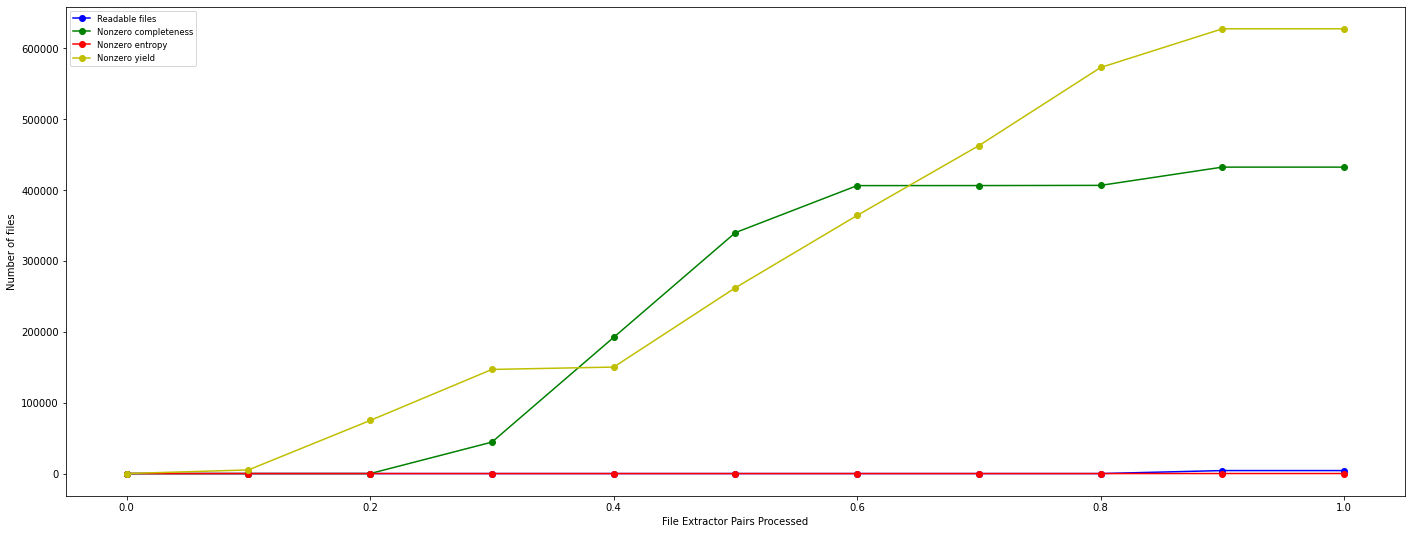

In [39]:
x = np.asarray(x)

plt.figure(figsize=(24, 9))
plt.xlabel("File Extractor Pairs Processed")
plt.ylabel("Number of files")
plt.plot(x, file_count['readability'], '-o', color='b', label='Readable files')
plt.plot(x, file_count['completeness'], '-o', color='g', label='Nonzero completeness')
plt.plot(x, file_count['entropy'], '-o', color='r', label='Nonzero entropy')
plt.plot(x, file_count['yield'], '-o', color='y', label='Nonzero yield')
plt.legend(fontsize='small')

In [28]:
for k, v in file_count.items():
	print(v)

[0, 0, 0, 1, 1, 1, 1, 1, 1, 4224, 4224]
[0, 0, 0, 44350, 192108, 339846, 406136, 406197, 406451, 432211, 432211]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 60, 60]
[0, 5132, 74905, 146863, 150172, 262075, 364091, 462557, 572731, 627295, 627295]


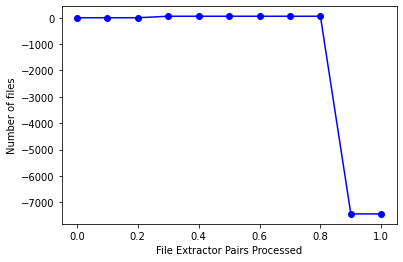

In [29]:
x = np.asarray(x)

plt.xlabel("File Extractor Pairs Processed")
plt.ylabel("Number of files")
plt.plot(x, total['readability'], '-o', color='b', label='Readable files')

In [30]:
x = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
extractor_count = {"c-code": [], "hdf": [], "images": [], "jsonxml": [], "keyword": [], "netcdf": [], "python": []}
extractor_thresh = {"c-code": 0, "hdf": 0, "images": 0, "jsonxml": 0, "keyword": 0, "netcdf": 0, "python": 0}


thresholds = x.copy()
for i in range(len(thresholds)):
	thresholds[i] = int(len(cdiac_priority_list) * thresholds[i])

print(thresholds)
thresholds = set(thresholds) 
print(thresholds)
tabs = 0
i = 0
while i < len(cdiac_priority_list):

	if i == 0:
		for k, v in extractor_count.items():
			v.append(0)
	elif i + 1 in thresholds:
		print(i + 1)
		for k, v in extractor_thresh.items():
			extractor_count[k].append(v)

	if cdiac_priority_list[i][1] != 'tabular':
		extractor_thresh[cdiac_priority_list[i][1]] += 1

	i += 1

print(len(cdiac_priority_list))
print(extractor_thresh)


[0, 150043, 300087, 450131, 600175, 750219, 900262, 1050306, 1200350, 1350394, 1500438]
{0, 1050306, 900262, 750219, 600175, 450131, 1500438, 300087, 1350394, 150043, 1200350}
150043
300087
450131
600175
750219
900262
1050306
1200350
1350394
1500438
1500438
{'c-code': 214362, 'hdf': 0, 'images': 214362, 'jsonxml': 214314, 'keyword': 214362, 'netcdf': 214362, 'python': 214362}


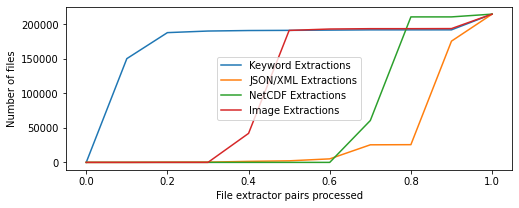

In [31]:
plt.figure(figsize=(8, 3))
plt.plot(x, extractor_count["keyword"], label="Keyword Extractions")
#plt.plot(x, extractor_count["c-code"], label="C-code Extractions")
plt.plot(x, extractor_count["jsonxml"], label="JSON/XML Extractions")
plt.plot(x, extractor_count["netcdf"], label="NetCDF Extractions")
plt.plot(x, extractor_count["images"], label="Image Extractions")
#plt.plot(x, extractor_count["python"], label="Python Extractions")

plt.xlabel("File extractor pairs processed")
plt.ylabel("Number of files")
plt.legend()
plt.show()

In [32]:
print(extractor_count["jsonxml"])

[0, 22, 267, 375, 1472, 2253, 5087, 25412, 25617, 175317, 214314]
